**Loading the Dataset and importing appropriate Libraries**

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
url = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
df=pd.read_csv(url)
# df._get_value(0 , 'A')
df

Mounted at /content/drive


,A,B
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


In [ ]:
df.describe()

,A,B
count,1.000000e+03,1.000000e+03
mean,4.075000e-07,2.227000e-07
std,3.844598e+00,4.107583e+00
min,-9.494100e+00,-8.836600e+00
25%,-2.021900e+00,-2.391100e+00
50%,7.883000e-02,1.096400e-01
75%,2.468000e+00,2.414475e+00
max,8.566400e+00,9.172600e+00


**Plotting the data using scatter plot !!!**


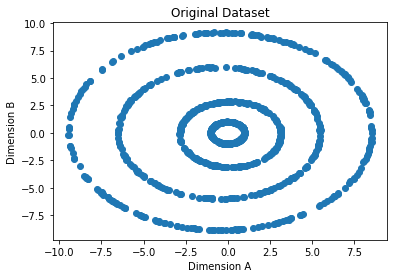

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['A'],df['B'])
plt.xlabel('Dimension A')
plt.ylabel('Dimension B')
plt.title('Original Dataset')
plt.show()

In [ ]:
len(df)

1000

**Calculating the Mean.**

In [ ]:
x_mean = 0
y_mean = 0
for i in range(len(df)):
  x_mean = x_mean + df.iloc[i][0]
  y_mean = y_mean + df.iloc[i][1]
x_mean = x_mean / 1000
y_mean = y_mean / 1000
print(x_mean , y_mean)
mean = [x_mean,y_mean]
print(mean)


4.0749999997216625e-07 2.2269999997881483e-07
[4.0749999997216625e-07, 2.2269999997881483e-07]


In [ ]:
mean = df.mean(axis = 0)
mean

A    4.075000e-07
B    2.227000e-07
dtype: float64

**Centering the data**

In [ ]:
for i in range(len(df)):
  df.iloc[i][0] = df.iloc[i][0] - mean[0]
  df.iloc[i][1] = df.iloc[i][1] - mean[1]
df

,A,B
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


In [ ]:
df.shape[1]

2

**Implement the Covariance Matrix**

In [ ]:
cov_mat = []
for i in range(df.shape[1]):
  cov = []
  for j in range(df.shape[1]):
    mul = 0
    for k  in range(len(df)):
      mul = mul + df.iloc[k][i] * df.iloc[k][j]
    mul = mul / (len(df)-1)
    cov.append(mul)
  cov_mat.append(cov)
print(cov_mat)

[[14.780936697738323, 0.8096687081840154], [0.8096687081840154, 16.872235626360773]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

array([14.50410886, 17.14906347])

In [ ]:
eigenvectors

array([[-0.9462227, -0.323516 ],
       [ 0.323516 , -0.9462227]])

**Sort the Eigen Vectors in decreasing order of their Eigen Values !**

In [ ]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

In [ ]:
sorted_eigenvalues

array([17.14906347, 14.50410886])

In [ ]:
sorted_eigenvectors

array([[ 0.323516 , -0.9462227],
       [-0.9462227, -0.323516 ]])

**Taking Principal Components !!**

In [ ]:
n_components = 1
pca1 = sorted_eigenvectors[:, 0 : n_components]
pca1

array([[ 0.323516 ],
       [-0.9462227]])

In [ ]:
n_components = 2
pca2 = sorted_eigenvectors[:, 1 : n_components]
pca2

array([[-0.9462227],
       [-0.323516 ]])

**Plotting the Eigen Values  and the corresponding PCs**

In [ ]:
k = [1,2]

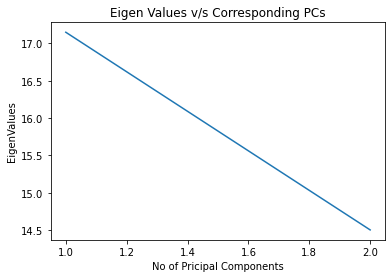

In [ ]:
plt.plot(k,sorted_eigenvalues)
plt.xlabel('No of Pricipal Components')
plt.ylabel('EigenValues')
plt.title('Eigen Values v/s Corresponding PCs')
plt.show()

**Projecting the Data points on the Top 2 Principal Components**



In [ ]:
Projected = np.matmul(df,sorted_eigenvectors)

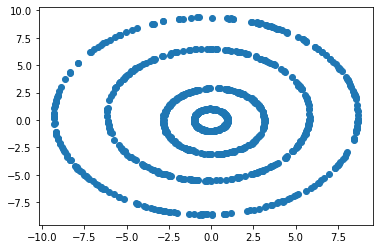

In [ ]:
import matplotlib.pyplot as plt
#Plotting the projected points
plt.scatter(Projected[0], Projected[1])

**Computing the Variance**

In [ ]:
var = np.zeros(2)
for i in range(len(df)):
  mul = np.multiply(df.iloc[i] , df.iloc[i])
  var = np.add(var,mul)
var = np.multiply(var, 1 / len(df))
print(var)

A    14.766156
B    16.855363
dtype: float64
